# Calculations with flat membranes

In [15]:
from sigmaepsilon.solid.material import MembraneSection as Section
from sigmaepsilon.math.linalg import ReferenceFrame
from sigmaepsilon.solid.material import (
    ElasticityTensor,
    LinearElasticMaterial,
    HuberMisesHenckyFailureCriterion_M,
)
from sigmaepsilon.solid.material.utils import elastic_stiffness_matrix

E = 2890.0
nu = 0.2
yield_strength = 2.0
thickness = 25.0

hooke = elastic_stiffness_matrix(E=E, NU=nu)
frame = ReferenceFrame(dim=3)
stiffness = ElasticityTensor(hooke, frame=frame, tensorial=False)

failure_model = HuberMisesHenckyFailureCriterion_M(yield_strength=yield_strength)

material = LinearElasticMaterial(stiffness=stiffness, failure_model=failure_model)

section = Section(
    layers=[
        Section.Layer(material=material, thickness=thickness / 3),
        Section.Layer(material=material, thickness=thickness / 3),
        Section.Layer(material=material, thickness=thickness / 3),
    ]
)
section.elastic_stiffness_matrix().shape

(3, 3)

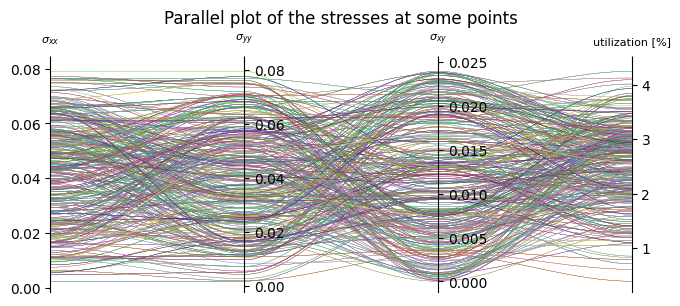

In [16]:
from sigmaepsilon.mesh.plotting import parallel_mpl
import numpy as np

strains = 2 * np.random.rand(300, 3) / 100000  # random data
z = np.array([-1.0, 0.0, 1.0])

stresses = section.calculate_stresses(strains=strains, z=z).values
util = section.utilization(strains=strains, z=z).values * 100

nXY, nZ, nStress = stresses.shape
stresses = stresses.reshape((nXY*nZ, nStress))
util = util.reshape((nXY*nZ))

colors = np.random.rand(stresses.shape[0], 3)
labels = [str(i) for i in range(stresses.shape[-1])]
values = [stresses[:, i] for i in range(stresses.shape[-1])]
values += [util]

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]
labels += [r"utilization [%]"]

_ = parallel_mpl(
    values,
    labels=labels,
    padding=0.05,
    lw=0.2,
    colors=colors,
    title="Parallel plot of the stresses at some points",
)

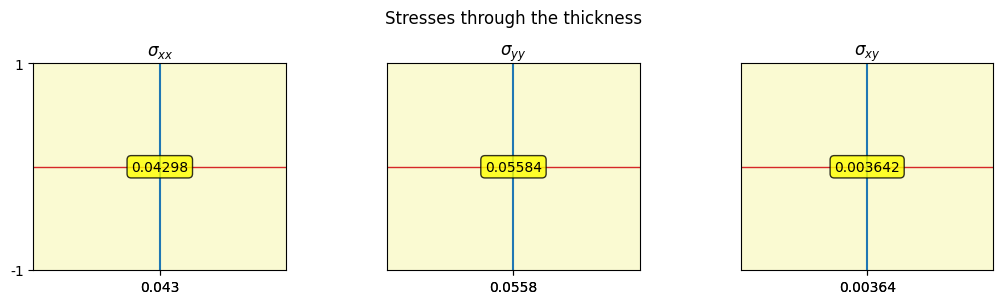

In [17]:
from sigmaepsilon.mesh.plotting.mpl.parallel import aligned_parallel_mpl
import numpy as np

n_data = 150
z = np.linspace(-1.0, 1.0, n_data)
stresses = section.calculate_stresses(strains=strains, z=z).values

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]

fig = aligned_parallel_mpl(
    stresses[50, :, :],
    z,
    yticks=[-1, 1],
    y0=0.0,
    figsize=(12, 3),
    suptitle="Stresses through the thickness",
    labels=labels,
)

# Adjusts the top of the subplots to make room for the title
fig.subplots_adjust(top=0.80) 

In [18]:
strains = 2 * np.random.rand(300, 3) / 100000  # random data
z = np.array([-1.0, 0.0, 1.0])
stresses = section.calculate_stresses(strains=strains, z=z)
stresses

<xarray.DataArray (index: 300, point: 3, component: 3)>
array([[[0.01331139, 0.00540291, 0.02203869],
        [0.01331139, 0.00540291, 0.02203869],
        [0.01331139, 0.00540291, 0.02203869]],

       [[0.06023705, 0.03442893, 0.01301018],
        [0.06023705, 0.03442893, 0.01301018],
        [0.06023705, 0.03442893, 0.01301018]],

       [[0.02123133, 0.01444967, 0.01228729],
        [0.02123133, 0.01444967, 0.01228729],
        [0.02123133, 0.01444967, 0.01228729]],

       ...,

       [[0.01813365, 0.06152179, 0.02041116],
        [0.01813365, 0.06152179, 0.02041116],
        [0.01813365, 0.06152179, 0.02041116]],

       [[0.05066163, 0.0566742 , 0.01111414],
        [0.05066163, 0.0566742 , 0.01111414],
        [0.05066163, 0.0566742 , 0.01111414]],

       [[0.0200557 , 0.05494148, 0.01498066],
        [0.0200557 , 0.05494148, 0.01498066],
        [0.0200557 , 0.05494148, 0.01498066]]])
Coordinates:
  * index      (index) int32 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * point      (point) int32 0 1 2
  * component  (component) <U3 'SXX' 'SYY' 'SXY'

In [21]:
stresses.sel(index = 80).to_pandas()

component,SXX,SYY,SXY
point,,,
0,0.039908,0.059489,0.007894
1,0.039908,0.059489,0.007894
2,0.039908,0.059489,0.007894


In [20]:
stresses.sel(component = "SXX").to_pandas()

point,0,1,2
index,,,
0,0.013311,0.013311,0.013311
1,0.060237,0.060237,0.060237
2,0.021231,0.021231,0.021231
3,0.039196,0.039196,0.039196
4,0.019861,0.019861,0.019861
...,...,...,...
295,0.058407,0.058407,0.058407
296,0.041084,0.041084,0.041084
297,0.018134,0.018134,0.018134


In [ ]:
stresses.sel(component = "SXX", point=0)

<xarray.DataArray (index: 300)>
array([0.02633761, 0.03966763, 0.0549832 , 0.03988701, 0.0135648 ,
       0.06215169, 0.0585774 , 0.0565408 , 0.05289708, 0.04717992,
       0.04660901, 0.05324189, 0.00945821, 0.0462054 , 0.07376298,
       0.03368739, 0.02017836, 0.05496718, 0.03797127, 0.03871467,
       0.04667442, 0.00873141, 0.06652799, 0.00619378, 0.00679508,
       0.0366592 , 0.0282872 , 0.03658622, 0.0645537 , 0.05222093,
       0.03530968, 0.04523148, 0.02106774, 0.00490368, 0.01693273,
       0.01668624, 0.05758671, 0.02543001, 0.04459477, 0.04762144,
       0.05782955, 0.05420916, 0.01116473, 0.02803311, 0.04670482,
       0.03422598, 0.03338392, 0.04284367, 0.01423371, 0.03944391,
       0.01424338, 0.0345845 , 0.02231057, 0.04858736, 0.0687434 ,
       0.05159463, 0.03471118, 0.05679229, 0.01799433, 0.03105972,
       0.01763445, 0.01945669, 0.02980938, 0.05673785, 0.06181698,
       0.07396675, 0.02314051, 0.02828646, 0.04590677, 0.04559747,
       0.04247868, 0.01073374, 0.02329677, 0.01426646, 0.04362044,
       0.04655794, 0.03769069, 0.0069301 , 0.01513562, 0.0058161 ,
       0.04508243, 0.06157005, 0.01162219, 0.03440876, 0.06050263,
       0.02882976, 0.01243415, 0.01461263, 0.05260988, 0.04803581,
       0.02775176, 0.03764149, 0.04255028, 0.05492357, 0.03354152,
       0.03209249, 0.00775336, 0.0693788 , 0.03903997, 0.02215426,
...
       0.01073113, 0.06095999, 0.03633268, 0.02037079, 0.04947258,
       0.05861131, 0.05799285, 0.04805439, 0.04623639, 0.06967416,
       0.04196933, 0.01387116, 0.0252749 , 0.07115025, 0.05400678,
       0.05114977, 0.03026382, 0.0184117 , 0.05466765, 0.0755138 ,
       0.06396338, 0.06087934, 0.02359479, 0.00421298, 0.0100615 ,
       0.03639119, 0.05653733, 0.03462877, 0.02843686, 0.06523962,
       0.02620669, 0.06098733, 0.07306199, 0.02571655, 0.03265504,
       0.03073508, 0.05070886, 0.01389887, 0.03438206, 0.01706122,
       0.05083624, 0.05194191, 0.0196521 , 0.07650741, 0.06598916,
       0.01434597, 0.01244301, 0.03476721, 0.06015702, 0.04529542,
       0.07158152, 0.04412622, 0.04776626, 0.05620147, 0.05664527,
       0.017876  , 0.01590585, 0.04790012, 0.06515542, 0.05972043,
       0.06831895, 0.04780044, 0.06591017, 0.05015384, 0.05924054,
       0.05426406, 0.02816286, 0.01234103, 0.01715646, 0.02183143,
       0.06843924, 0.03619034, 0.05163153, 0.03940001, 0.0588311 ,
       0.02252372, 0.00446334, 0.04584915, 0.04113502, 0.02075993,
       0.04291068, 0.04112456, 0.02008829, 0.07241262, 0.05401485,
       0.07275011, 0.02991345, 0.03964493, 0.02655125, 0.02966712,
       0.01332351, 0.03015813, 0.03228228, 0.05888247, 0.05551855,
       0.05453979, 0.01935364, 0.02857107, 0.06404792, 0.02833939])
Coordinates:
  * index      (index) int32 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
    point      int32 0
    component  <U3 'SXX'

In [ ]:
section.calculate_stresses(strains=strains)

<xarray.DataArray (index: 300, layer: 3, point: 3, component: 3)>
array([[[[0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ]],

        [[0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ]],

        [[0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ],
         [0.02633761, 0.06379968, 0.0224422 ]]],


       [[[0.03966763, 0.03535943, 0.0179444 ],
         [0.03966763, 0.03535943, 0.0179444 ],
         [0.03966763, 0.03535943, 0.0179444 ]],

        [[0.03966763, 0.03535943, 0.0179444 ],
         [0.03966763, 0.03535943, 0.0179444 ],
         [0.03966763, 0.03535943, 0.0179444 ]],
...
        [[0.06404792, 0.02098285, 0.01937404],
         [0.06404792, 0.02098285, 0.01937404],
         [0.06404792, 0.02098285, 0.01937404]],

        [[0.06404792, 0.02098285, 0.01937404],
         [0.06404792, 0.02098285, 0.01937404],
         [0.06404792, 0.02098285, 0.01937404]]],


       [[[0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691]],

        [[0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691]],

        [[0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691],
         [0.02833939, 0.06262151, 0.02219691]]]])
Coordinates:
  * index      (index) int32 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * layer      (layer) int32 0 1 2
  * point      (point) int32 0 1 2
  * component  (component) <U3 'SXX' 'SYY' 'SXY'

In [ ]:
section.utilization(strains=strains)

<xarray.DataArray (index: 300, layer: 3, point: 3)>
array([[[0.03389209, 0.03389209, 0.03389209],
        [0.03389209, 0.03389209, 0.03389209],
        [0.03389209, 0.03389209, 0.03389209]],

       [[0.02442944, 0.02442944, 0.02442944],
        [0.02442944, 0.02442944, 0.02442944],
        [0.02442944, 0.02442944, 0.02442944]],

       [[0.03328698, 0.03328698, 0.03328698],
        [0.03328698, 0.03328698, 0.03328698],
        [0.03328698, 0.03328698, 0.03328698]],

       ...,

       [[0.02946675, 0.02946675, 0.02946675],
        [0.02946675, 0.02946675, 0.02946675],
        [0.02946675, 0.02946675, 0.02946675]],

       [[0.03288073, 0.03288073, 0.03288073],
        [0.03288073, 0.03288073, 0.03288073],
        [0.03288073, 0.03288073, 0.03288073]],

       [[0.03327171, 0.03327171, 0.03327171],
        [0.03327171, 0.03327171, 0.03327171],
        [0.03327171, 0.03327171, 0.03327171]]])
Coordinates:
  * index    (index) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * layer    (layer) int32 0 1 2
  * point    (point) int32 0 1 2

In [ ]:
section.utilization(strains=strains, z=z)

<xarray.DataArray (index: 300, point: 3)>
array([[0.03389209, 0.03389209, 0.03389209],
       [0.02442944, 0.02442944, 0.02442944],
       [0.03328698, 0.03328698, 0.03328698],
       [0.02094459, 0.02094459, 0.02094459],
       [0.02467644, 0.02467644, 0.02467644],
       [0.0322893 , 0.0322893 , 0.0322893 ],
       [0.02774045, 0.02774045, 0.02774045],
       [0.02880389, 0.02880389, 0.02880389],
       [0.03109369, 0.03109369, 0.03109369],
       [0.02367929, 0.02367929, 0.02367929],
       [0.03020589, 0.03020589, 0.03020589],
       [0.03092521, 0.03092521, 0.03092521],
       [0.02067824, 0.02067824, 0.02067824],
       [0.02731055, 0.02731055, 0.02731055],
       [0.03998089, 0.03998089, 0.03998089],
       [0.02470482, 0.02470482, 0.02470482],
       [0.01200553, 0.01200553, 0.01200553],
       [0.02587054, 0.02587054, 0.02587054],
       [0.03314517, 0.03314517, 0.03314517],
       [0.01770506, 0.01770506, 0.01770506],
...
       [0.02819574, 0.02819574, 0.02819574],
       [0.02671429, 0.02671429, 0.02671429],
       [0.01638037, 0.01638037, 0.01638037],
       [0.03905939, 0.03905939, 0.03905939],
       [0.02475049, 0.02475049, 0.02475049],
       [0.04213691, 0.04213691, 0.04213691],
       [0.0181638 , 0.0181638 , 0.0181638 ],
       [0.02483849, 0.02483849, 0.02483849],
       [0.02618922, 0.02618922, 0.02618922],
       [0.01877848, 0.01877848, 0.01877848],
       [0.00963994, 0.00963994, 0.00963994],
       [0.02808762, 0.02808762, 0.02808762],
       [0.01947881, 0.01947881, 0.01947881],
       [0.0276381 , 0.0276381 , 0.0276381 ],
       [0.0249096 , 0.0249096 , 0.0249096 ],
       [0.02593717, 0.02593717, 0.02593717],
       [0.01549652, 0.01549652, 0.01549652],
       [0.02946675, 0.02946675, 0.02946675],
       [0.03288073, 0.03288073, 0.03288073],
       [0.03327171, 0.03327171, 0.03327171]])
Coordinates:
  * index    (index) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * point    (point) int32 0 1 2